<a href="https://colab.research.google.com/github/mohib988/workshop/blob/master/Copy_of_FYP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time
import matplotlib.pyplot as plt

from sklearn import preprocessing
%matplotlib inline



In [ ]:
pathfile="/content/drive/MyDrive/AnomalyDetection.csv"
df=pd.read_csv(pathfile)


In [ ]:
df.columns

Index(['Unnamed: 0', 'srb_invoice_id', 'pos_id', 'ntn', 'name', 'invoice_date',
       'invoice_no', 'rate_value', 'sales_value', 'sales_tax', 'consumer_name',
       'consumer_ntn', 'consumer_address', 'tariff_code', 'extra_info',
       'pos_user', 'pos_pass', 'is_active', 'created_date_time',
       'invoice_type', 'consider_for_Annex'],
      dtype='object')

In [ ]:
#HIIIII

In [ ]:
df=df.drop("Unnamed: 0",axis=1)

In [ ]:
df

,srb_invoice_id,pos_id,ntn,name,invoice_date,invoice_no,rate_value,sales_value,sales_tax,consumer_name,consumer_ntn,consumer_address,tariff_code,extra_info,pos_user,pos_pass,is_active,created_date_time,invoice_type,consider_for_Annex
0,38720231116061635888,387,55,Rylee Yu,2023-11-16 06:16:42.000,39533554,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0819531_387,NaN,1,2023-11-16 06:16:36.000,1.0,1
1,453231116193635470,452,219,Hunter Ortiz,2023-11-16 19:36:35.000,0039-701-254869,13.0,79.650000,10.350000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2023-11-17 12:21:54.000,1.0,1
2,1015231118021500582,1015,3,Luna Sanders,2023-11-18 02:12:24.000,35628,13.0,2399.000000,275.880000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2023-11-18 02:24:16.000,1.0,1
3,284231114221443100,286,161,Hudson Liu,2023-11-14 22:14:43.000,23318127001218180072,13.0,1150.439941,149.559998,NaN,NaN,"FOOD COURT ATRIUM MALL, KARACHI",NaN,NaN,NaN,NaN,1,2023-11-16 18:02:24.000,1.0,1
4,144230805203458670,145,161,Hudson Liu,2023-08-05 20:34:58.000,2321712700280331809,13.0,331.859985,43.139999,NaN,NaN,"SHOP NO. 15 2ND FLOOR, BLOCK-4 SCHEME-5, CLIFT...",NaN,NaN,NaN,NaN,1,2023-11-17 04:01:03.000,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,64320231116205101,643,90,Gabriel Brooks,2023-11-16 20:51:01.000,122082,13.0,1221.000000,158.600000,Mateo Williams,136,NaN,NaN,NaN,NaN,NaN,1,2023-11-16 20:58:56.000,1.0,1
9996,69020231119080903840,690,69,Penelope Guerrero,2023-11-19 08:09:00.000,74500,13.0,200.000000,26.000000,N / A,N / A,N / A,N / A,N / A,2565752,NaN,1,2023-11-19 08:09:04.000,1.0,1
9997,144231116160258223,145,161,Hudson Liu,2023-11-16 16:02:58.000,2332012700280330096,13.0,177.000000,23.010000,NaN,NaN,"SHOP NO. 15 2ND FLOOR, BLOCK-4 SCHEME-5, CLIFT...",NaN,NaN,NaN,NaN,1,2023-11-18 10:07:51.000,1.0,1
9998,845231120220614308,845,127,Mila Leung,2023-11-20 22:06:14.000,845-114-23-44693,13.0,655.000000,85.000000,Mateo Williams,136.0,NaN,NaN,NaN,NaN,NaN,1,2023-11-20 22:22:12.000,1.0,1


In [ ]:
df['created_date_time']=pd.to_datetime(df['created_date_time'])
df['invoice_date']=pd.to_datetime(df['invoice_date'])


In [ ]:
df["month"]=pd.DatetimeIndex(df['invoice_date']).month
df["weekday"]=pd.DatetimeIndex(df['invoice_date']).weekday

In [ ]:
df.describe()

,pos_id,ntn,rate_value,sales_value,sales_tax,pos_pass,is_active,invoice_type,consider_for_Annex,month,weekday
count,10000.00000,10000.000000,9998.000000,10000.000000,10000.000000,0.0,10000.0,9978.000000,10000.000000,10000.000000,10000.000000
mean,433.39160,127.037300,19.654067,1474.498852,191.225420,NaN,1.0,1.115354,0.956000,10.695400,3.065500
std,279.93753,69.526544,208.021828,3500.942037,452.182708,NaN,0.0,1.596837,0.205105,0.870457,2.021044
min,2.00000,1.000000,0.000000,-3008.850000,-391.150000,NaN,1.0,0.000000,0.000000,7.000000,0.000000
25%,165.00000,55.000000,13.000000,318.580000,41.417500,NaN,1.0,1.000000,1.000000,11.000000,1.000000
50%,395.00000,161.000000,13.000000,780.000000,102.389999,NaN,1.0,1.000000,1.000000,11.000000,3.000000
75%,571.00000,182.000000,13.000000,1565.342500,205.922300,NaN,1.0,1.000000,1.000000,11.000000,5.000000
max,1115.00000,249.000000,8110.000000,156000.000000,20280.000000,NaN,1.0,49.000000,1.000000,12.000000,6.000000


In [ ]:
# total null values for consumer
print(df.consumer_name.isna().sum())
print(df.consumer_ntn.isna().sum())
print(df.consumer_address.isna().sum())


8416
8477
7895


In [ ]:
a=df.groupby(["month","ntn"]).sales_value.sum().reset_index(name="Sales")
a.set_index("ntn")

,month,Sales
ntn,,
161,7,156415.829414
161,8,363229.587765
61,9,2242.000000
161,9,284052.059307
61,10,5590.000000
...,...,...
245,11,31645.115044
246,11,71009.000000
248,11,42820.000000


In [ ]:
px.line(x=a.month,y=a.Sales,color=a.ntn)


#Sales `Averga` and Sales `Sum` Per Weeks

In [ ]:
a=df.groupby("weekday").sales_value.sum().reset_index(name="total_sales_per_week")
a.sort_values(by="total_sales_per_week",ascending=False)

,weekday,total_sales_per_week
6,6,2.774255e+06
1,1,2.507581e+06
5,5,2.385937e+06
4,4,2.048875e+06
3,3,1.791916e+06
2,2,1.774179e+06
0,0,1.462246e+06


In [ ]:
a=df.groupby("weekday").sales_value.mean().reset_index(name="average_sales_per_week")
a.sort_values(by="average_sales_per_week",ascending=False)

,weekday,average_sales_per_week
6,6,1794.472523
3,3,1512.165338
5,5,1502.479195
4,4,1499.908257
2,2,1409.196821
1,1,1318.391932
0,0,1267.111074


In [ ]:
grouped_data = df.groupby('weekday')['sales_value'].sum().reset_index()

# Create a bar plot using Plotly Express
fig = px.bar(grouped_data, x='weekday', y='sales_value', labels={'sales_value': 'Sum of Sales Value', 'weekday': 'Weekday'})
fig.update_layout(title='Sum of Sales Value by Weekday')
fig.show()

In [ ]:
filtered_df = df[(df["consumer_name"]==0) & (df["consumer_address"]==0)]

# Create a line plot with weeks and sales for non-null consumer addresses using Plotly Express
# sns.barplot(filtered_df, x='weekday', y='sales_value' )


In [ ]:
df

,srb_invoice_id,pos_id,ntn,name,invoice_date,invoice_no,rate_value,sales_value,sales_tax,consumer_name,...,tariff_code,extra_info,pos_user,pos_pass,is_active,created_date_time,invoice_type,consider_for_Annex,month,weekday
0,38720231116061635888,387,55,Rylee Yu,2023-11-16 06:16:42,39533554,0.0,0.000000,0.000000,NaN,...,NaN,NaN,0819531_387,NaN,1,2023-11-16 06:16:36,1.0,1,11,3
1,453231116193635470,452,219,Hunter Ortiz,2023-11-16 19:36:35,0039-701-254869,13.0,79.650000,10.350000,NaN,...,NaN,NaN,NaN,NaN,1,2023-11-17 12:21:54,1.0,1,11,3
2,1015231118021500582,1015,3,Luna Sanders,2023-11-18 02:12:24,35628,13.0,2399.000000,275.880000,NaN,...,NaN,NaN,NaN,NaN,1,2023-11-18 02:24:16,1.0,1,11,5
3,284231114221443100,286,161,Hudson Liu,2023-11-14 22:14:43,23318127001218180072,13.0,1150.439941,149.559998,NaN,...,NaN,NaN,NaN,NaN,1,2023-11-16 18:02:24,1.0,1,11,1
4,144230805203458670,145,161,Hudson Liu,2023-08-05 20:34:58,2321712700280331809,13.0,331.859985,43.139999,NaN,...,NaN,NaN,NaN,NaN,1,2023-11-17 04:01:03,1.0,1,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,64320231116205101,643,90,Gabriel Brooks,2023-11-16 20:51:01,122082,13.0,1221.000000,158.600000,Mateo Williams,...,NaN,NaN,NaN,NaN,1,2023-11-16 20:58:56,1.0,1,11,3
9996,69020231119080903840,690,69,Penelope Guerrero,2023-11-19 08:09:00,74500,13.0,200.000000,26.000000,N / A,...,N / A,N / A,2565752,NaN,1,2023-11-19 08:09:04,1.0,1,11,6
9997,144231116160258223,145,161,Hudson Liu,2023-11-16 16:02:58,2332012700280330096,13.0,177.000000,23.010000,NaN,...,NaN,NaN,NaN,NaN,1,2023-11-18 10:07:51,1.0,1,11,3
9998,845231120220614308,845,127,Mila Leung,2023-11-20 22:06:14,845-114-23-44693,13.0,655.000000,85.000000,Mateo Williams,...,NaN,NaN,NaN,NaN,1,2023-11-20 22:22:12,1.0,1,11,0


#`Averge Sales` sorted for *resturants*

In [ ]:
a=df.groupby("ntn").sales_value.mean().reset_index(name="average_sales_per_rest")
a.sort_values(by="average_sales_per_rest",ascending=False)

,ntn,average_sales_per_rest
108,122,31143.000000
127,144,21640.000000
159,179,19957.500000
177,201,19047.615000
26,30,17598.000000
...,...,...
109,123,371.038462
163,184,366.548600
14,16,350.000000
148,167,240.800000


In [ ]:
# Total Registerd Restaurants
df.ntn.nunique()

218

In [ ]:
# total pos systems
df['pos_id'].nunique()


596

###Total **Pos** for each Restaurant

In [ ]:
ntn_pos_count = df.groupby('ntn')['pos_id'].nunique().reset_index(name='total_pos')

# Finding the NTN with the most unique POS occurrences
# ntn_with_most_pos = ntn_pos_count.loc[ntn_pos_count['total_unique_pos_count'].idxmax()]

# print("NTN with the most unique POS occurrences:")
print(ntn_pos_count.sort_values(by="total_pos",ascending=False))

     ntn  total_pos
194  219         76
142  161         67
48    55         27
68    75         23
195  220         16
..   ...        ...
88    98          1
90   101          1
91   103          1
92   104          1
217  249          1

[218 rows x 2 columns]


In [ ]:
total_value=ntn_pos_count['total_pos'].count()

In [ ]:
fig = px.pie(values=ntn_pos_count['total_pos'], names=ntn_pos_count['ntn'])
total_value=ntn_pos_count['total_pos'].sum()
fig.update_layout(
    autosize=False,
    margin=dict(l=20, r=20, t=20, b=20),
    width=600,  # Adjust the width as needed
    height=600  # Adjust the height as needed
)

# Update hover information (customizing what appears on hover)
fig.update_traces(
  hovertemplate='<b>ntn=%{label}</b><br>no. of pos=%{value}',
    textinfo='value',
    textfont_size=1
)
fig.update_layout(annotations=[dict(text=f'Total: {total_value}', showarrow=False,font_size=14)])
fig.show()

##Restuarnt wtih less tax then `12%` percente

In [ ]:
df[['name',"rate_value"]][df["rate_value"]<12][df["name"]=="Anthony Rogers"].count()

<ipython-input-23-960aa3f39679>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



name          36
rate_value    36
dtype: int64

In [ ]:
filtered_data=df[['name',"rate_value","ntn","pos_id"]][df["rate_value"]<12]
fig = px.bar(filtered_data,x="name", y=filtered_data["rate_value"]+1,color="pos_id")

# Customizing colors to darker shades
fi    g.update_traces(marker_color='lightblue', marker_line_color='blue', marker_line_width=1)

# Adjusting the y-axis range to ensure all bars are visible
# fig.update_yaxes(range=[0, filtered_data["rate_value"].max() + 2])  # Adjust range as needed
fig.update_traces(hovertemplate='Value: %{y}')
fig.update_layout(xaxis_title='Owner Name', yaxis_title='each tax Count')
fig.show()


In [ ]:
fig = px.histogram(filtered_data,x="name", nbins=12, labels={'value':'Restaurant Owner Name',},
             title='Restaurant with low tax', marginal='violin',
                   color='ntn',
            color_discrete_sequence=['green'],
                    hover_data={'ntn': True})

fig.update_layout(legend=dict(title='Owner'))
fig.update_layout(xaxis_title='Owner Name', yaxis_title='Anomaly Count')
fig.show()

#**Most Buying Range**

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming 'df' is your DataFrame

# plt.figure(figsize=(10, 6))
# sns.set(style="whitegrid", rc={"axes.facecolor": "##FF914D"})  # Set background color

# sns.histplot(df["sales_value"], bins=400, color="#FFA500")  # Adjust the main histogram color
# plt.title('Sales Value',fontsize=20)
# plt.xlabel('Sales',fontsize=16)
# plt.ylabel('Sales Count',fontsize=16)
# plt.gcf().set_facecolor('#F6F6E9')
# plt.gca().set_facecolor('#F6F6E9')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.xlim(1, 6000)
# plt.show()
fig = px.histogram(df["sales_value"], nbins=500, labels={'value':'Restaurant Sales',},
             title='Sales Value', marginal='violin',
            color_discrete_sequence=['orange'])
fig.update_layout(legend=dict(title='sales'))
fig.update_layout(xaxis_title='Sales', yaxis_title='sales Count')
fig.show()


#**Unmatch total tax per sale**

In [ ]:
upper_bound=df['sales_value'] * (df['rate_value'] / 100 + 0.1)
lower_bound=df['sales_value'] * (df['rate_value'] / 100 - 0.1)
new1=(df["sales_tax"]>lower_bound) & (df["sales_tax"]<upper_bound)
new2=(df["sales_tax"]<lower_bound) | (df["sales_tax"]>upper_bound)
df.loc[new2, ["sales_tax", "sales_value", "rate_value"]]


,sales_tax,sales_value,rate_value
12,65.57,524.43,0.0
27,509.60,4431.00,3920.0
84,253.67,2205.00,0.0
99,51.19,445.00,0.0
113,281.86,0.00,13.0
...,...,...,...
9706,220.31,1915.00,0.0
9761,281.86,0.00,13.0
9924,63.27,586.73,0.0
9951,116.19,1010.00,0.0


In [ ]:
# Creating a scatter plot
fig = px.scatter(df, x='sales_tax', y='sales_value', color='ntn',
                 labels={'sales_value': 'Sales Value', 'sales_tax': 'Sales Tax', 'ntn': 'NTN','rate_value': 'Rate Value'},
                 title='Sales Value vs. Sales Tax by NTN',
                 hover_data={'ntn': True, 'sales_value': True, 'sales_tax': True,'rate_value':True,},
                 color_discrete_sequence=["BLUE"]
                 )

fig.update_layout(
    xaxis=dict(title='Sales Value'),
    yaxis=dict(title='Sales Tax'),
    legend=dict(title='NTN', orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1))

In [ ]:
df.ntn.nunique()

218

In [ ]:
a=(((df['created_date_time'] - df['invoice_date']))).dt.total_seconds().reset_index(name="time").sort_values(by="time")
a.loc[a["time"]>=0]
# a[a['index']==4410]

,index,time
4110,4110,0.0
9972,9972,0.0
3691,3691,0.0
4146,4146,0.0
6064,6064,0.0
...,...,...
2541,2541,28992084.0
821,821,28994518.0
776,776,29000919.0
8187,8187,29009722.0


In [ ]:
(df['created_date_time'][4410] - df['invoice_date'][4410])

Timedelta('0 days 00:11:25')

In [ ]:
df.loc[df.index==4110,["invoice_date","created_date_time"]]

,invoice_date,created_date_time
4110,2023-11-18 02:57:01,2023-11-18 02:57:01


##1. min max scaler for each column formula is `( x − x m i n ) / ( x m a x − x m i n )`
##2. Sklearn library processing could be used



In [ ]:
df.columns

Index(['srb_invoice_id', 'pos_id', 'ntn', 'name', 'invoice_date', 'invoice_no',
       'rate_value', 'sales_value', 'sales_tax', 'consumer_name',
       'consumer_ntn', 'consumer_address', 'tariff_code', 'extra_info',
       'pos_user', 'pos_pass', 'is_active', 'created_date_time',
       'invoice_type', 'consider_for_Annex', 'month', 'weekday'],
      dtype='object')

In [ ]:
df.rate_value=df.rate_value.fillna(0)

#Normalizing the Values

In [ ]:
num_cols=[ 'sales_value',"sales_tax","rate_value"]
from sklearn.preprocessing import StandardScaler

# Normalize the selected data
scaler = StandardScaler()
a = scaler.fit_transform(df[num_cols])

df["sales_value"]= a[:,0]
df["sales_tax"]= a[:,1]
df["rate_value"]= a[:,2]

### Just Ploting graph after nomalization

#### Droping all adjusting null values

In [ ]:
print(df.consumer_name.isna().sum())
print(df.consumer_ntn.isna().sum())
print(df.rate_value.isna())
print(df.tariff_code.isna().sum())

8416
8477
0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: rate_value, Length: 10000, dtype: bool
9631


In [ ]:
# df.columns

df.extra_info= df.extra_info.replace(['N / A',"0","0.0"], 0)
df.extra_info= df.extra_info.replace(['test'], 1)
df.extra_info=df.extra_info.fillna(0)
df.rate_value=df.rate_value.fillna(0)
df.consumer_address=df.consumer_address.fillna(0)
df.consumer_address=df.consumer_address.fillna(0)
df.consumer_address=df.consumer_address.replace(['N / A',"0","0.0"], 0)
# df.loc[df.consumer_name!=0,"consumer_name"]=1
df.consumer_name=df.consumer_name.fillna(0)





In [ ]:
# making every consumer_name=1
df.loc[(df.consumer_name!="N / A") & (df.consumer_name!=0) & (df.consumer_name!=""),"consumer_name"]=1
df.loc[(df.consumer_address!="N / A") & (df.consumer_address!=0) & (df.consumer_address!=""),"consumer_address"]=1

In [ ]:
drop_cols=["name","consumer_ntn","pos_pass","pos_user","tariff_code"]
df=df.drop(drop_cols,axis=1)

#_Reduced_ Columns now are

In [ ]:
df.columns

Index(['srb_invoice_id', 'pos_id', 'ntn', 'invoice_date', 'invoice_no',
       'rate_value', 'sales_value', 'sales_tax', 'consumer_name',
       'consumer_address', 'extra_info', 'is_active', 'created_date_time',
       'invoice_type', 'consider_for_Annex', 'month', 'weekday'],
      dtype='object')

In [ ]:
df

,srb_invoice_id,pos_id,ntn,invoice_date,invoice_no,rate_value,sales_value,sales_tax,consumer_name,consumer_address,extra_info,is_active,created_date_time,invoice_type,consider_for_Annex,month,weekday
0,38720231116061635888,387,55,2023-11-16 06:16:42,39533554,-0.094476,-0.421193,-0.422915,0,0,0.0,1,2023-11-16 06:16:36,1.0,1,11,3
1,453231116193635470,452,219,2023-11-16 19:36:35,0039-701-254869,-0.031973,-0.398441,-0.400025,0,0,0.0,1,2023-11-17 12:21:54,1.0,1,11,3
2,1015231118021500582,1015,3,2023-11-18 02:12:24,35628,-0.031973,0.264085,0.187223,0,0,0.0,1,2023-11-18 02:24:16,1.0,1,11,5
3,284231114221443100,286,161,2023-11-14 22:14:43,23318127001218180072,-0.031973,-0.092568,-0.092148,0,1,0.0,1,2023-11-16 18:02:24,1.0,1,11,1
4,144230805203458670,145,161,2023-08-05 20:34:58,2321712700280331809,-0.031973,-0.326397,-0.327507,0,1,0.0,1,2023-11-17 04:01:03,1.0,1,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,64320231116205101,643,90,2023-11-16 20:51:01,122082,-0.031973,-0.072412,-0.072155,1,0,0.0,1,2023-11-16 20:58:56,1.0,1,11,3
9996,69020231119080903840,690,69,2023-11-19 08:09:00,74500,-0.031973,-0.364063,-0.365414,N / A,0,0.0,1,2023-11-19 08:09:04,1.0,1,11,6
9997,144231116160258223,145,161,2023-11-16 16:02:58,2332012700280330096,-0.031973,-0.370633,-0.372026,0,1,0.0,1,2023-11-18 10:07:51,1.0,1,11,3
9998,845231120220614308,845,127,2023-11-20 22:06:14,845-114-23-44693,-0.031973,-0.234091,-0.234929,1,0,0.0,1,2023-11-20 22:22:12,1.0,1,11,0


In [ ]:

weekday_dummies = pd.get_dummies(df['weekday'], prefix='weekday')

# Concatenate the dummy variables with the original dataset
df = pd.concat([df, weekday_dummies], axis=1)

# Drop the original 'weekday' column if needed
df.drop('weekday', axis=1, inplace=True)  # Drop the original column
df.drop('month', axis=1, inplace=True)  # Drop the original column

# Display the updated dataset


In [ ]:
df

,srb_invoice_id,pos_id,ntn,invoice_date,invoice_no,rate_value,sales_value,sales_tax,consumer_name,consumer_address,...,created_date_time,invoice_type,consider_for_Annex,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,38720231116061635888,387,55,2023-11-16 06:16:42,39533554,-0.094476,-0.421193,-0.422915,0,0,...,2023-11-16 06:16:36,1.0,1,0,0,0,1,0,0,0
1,453231116193635470,452,219,2023-11-16 19:36:35,0039-701-254869,-0.031973,-0.398441,-0.400025,0,0,...,2023-11-17 12:21:54,1.0,1,0,0,0,1,0,0,0
2,1015231118021500582,1015,3,2023-11-18 02:12:24,35628,-0.031973,0.264085,0.187223,0,0,...,2023-11-18 02:24:16,1.0,1,0,0,0,0,0,1,0
3,284231114221443100,286,161,2023-11-14 22:14:43,23318127001218180072,-0.031973,-0.092568,-0.092148,0,1,...,2023-11-16 18:02:24,1.0,1,0,1,0,0,0,0,0
4,144230805203458670,145,161,2023-08-05 20:34:58,2321712700280331809,-0.031973,-0.326397,-0.327507,0,1,...,2023-11-17 04:01:03,1.0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,64320231116205101,643,90,2023-11-16 20:51:01,122082,-0.031973,-0.072412,-0.072155,1,0,...,2023-11-16 20:58:56,1.0,1,0,0,0,1,0,0,0
9996,69020231119080903840,690,69,2023-11-19 08:09:00,74500,-0.031973,-0.364063,-0.365414,N / A,0,...,2023-11-19 08:09:04,1.0,1,0,0,0,0,0,0,1
9997,144231116160258223,145,161,2023-11-16 16:02:58,2332012700280330096,-0.031973,-0.370633,-0.372026,0,1,...,2023-11-18 10:07:51,1.0,1,0,0,0,1,0,0,0
9998,845231120220614308,845,127,2023-11-20 22:06:14,845-114-23-44693,-0.031973,-0.234091,-0.234929,1,0,...,2023-11-20 22:22:12,1.0,1,1,0,0,0,0,0,0


In [ ]:
# Assuming 'df' is your DataFrame
# Drop non-numeric columns ('Timestamp' in this case)
df = df.select_dtypes(include=['float64', 'int64'])  # Selecting only numeric columns

# Handling missing values (filling with mean for example)
df.fillna(df.mean(), inplace=True)

# Normalize the data if needed (using StandardScaler)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df)

# Applying Isolation Forest
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(contamination=0.05)
isolation_forest.fit(df_normalized)

# Predict outliers/anomalies
outliers = isolation_forest.predict(df_normalized)


In [ ]:
# Add outlier predictions to the original DataFrame
df['outlier'] = outliers

# Display rows identified as outliers
detected_outliers = df[df['outlier'] == -1]  # Outliers are labeled as -1
print(detected_outliers)


      pos_id  ntn  rate_value  sales_value  sales_tax  extra_info  is_active  \
62       704  165   -0.031973     4.249212   4.277853         0.0          1   
63       453   55   -0.094476    -0.421193  -0.422915         0.0          1   
69       476   55   -0.094476    -0.421193  -0.422915         0.0          1   
76       374   55   -0.031973     0.079332   0.080844         0.0          1   
88       809   55   -0.094476    -0.421193  -0.422915         0.0          1   
...      ...  ...         ...          ...        ...         ...        ...   
9928     809   55   -0.094476    -0.421193  -0.422915         0.0          1   
9929     809   55   -0.094476    -0.421193  -0.422915         0.0          1   
9952     314   55   -0.094476    -0.421193  -0.422915         0.0          1   
9967     809   55   -0.094476    -0.421193  -0.422915         0.0          1   
9977      31   19   -0.031973    -0.086981  -0.086530         0.0          1   

      invoice_type  consider_for_Annex 

In [ ]:
fig = px.scatter(detected_outliers, x='sales_tax', y='sales_value', color='ntn',
                 labels={'sales_value': 'Sales Value', 'sales_tax': 'Sales Tax', 'ntn': 'NTN','rate_value': 'Rate Value'},
                 title='Sales Value vs. Sales Tax by NTN',
                 hover_data={'ntn': True, 'sales_value': True, 'sales_tax': True,'rate_value':True,},
                 color_discrete_sequence=["BLUE"]
                 )

fig.update_layout(
    xaxis=dict(title='Sales Value'),
    yaxis=dict(title='Sales Tax'),
    legend=dict(title='NTN', orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1))

In [ ]:
len(detected_outliers[detected_outliers.ntn==55])

331

In [ ]:
len(df[df.ntn==55])

2274

#Now will use adtk for rule base volume detection

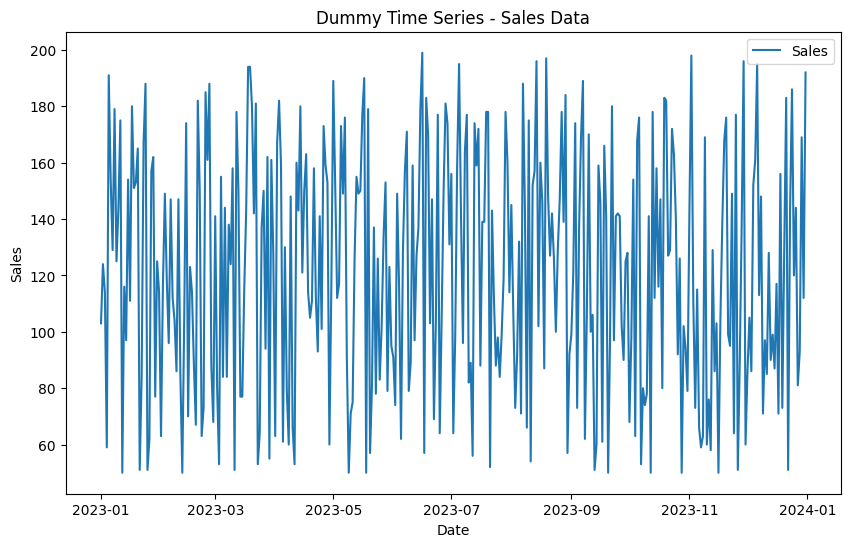

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creating a date range for the time series
date_range = pd.date_range(start='2023-01-01', periods=365)

# Generating random data for sales (you can replace this with your own data)
sales_data = np.random.randint(50, 200, size=len(date_range))

# Creating a pandas DataFrame with date as index and sales data
time_series_data = pd.DataFrame({'Date': date_range, 'Sales': sales_data})
time_series_data = time_series_data.set_index('Date')

# Plotting the time series data
plt.figure(figsize=(10, 6))
plt.plot(time_series_data.index, time_series_data['Sales'], label='Sales')
plt.title('Dummy Time Series - Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


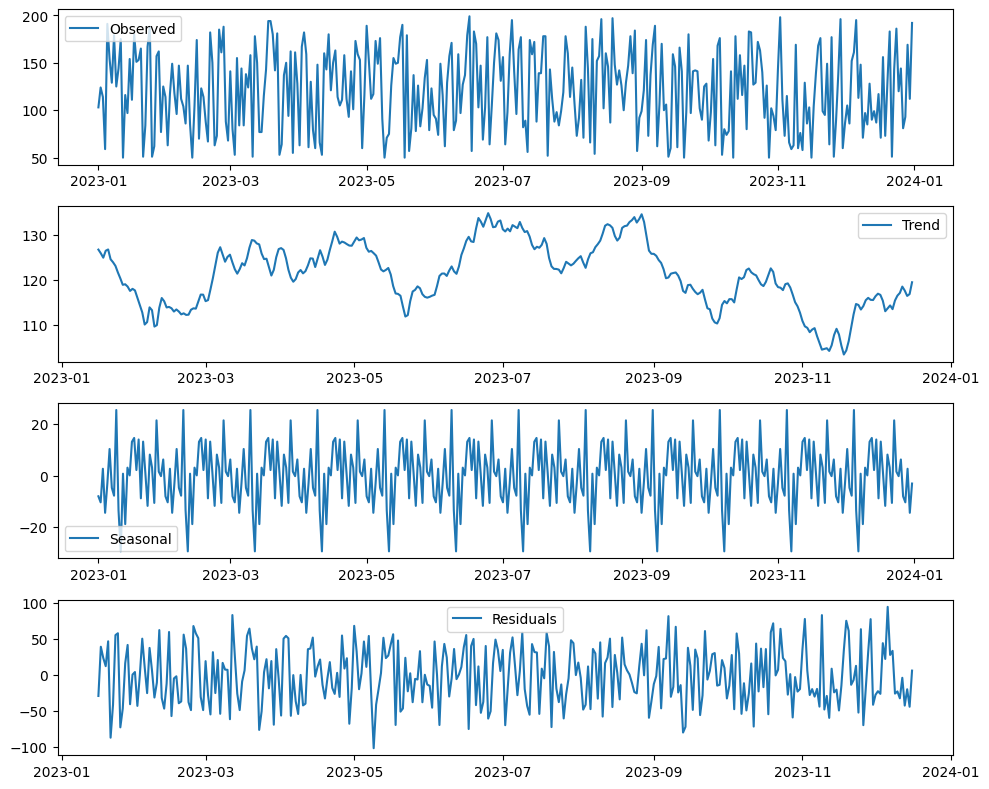

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing the time series data to identify trends and seasonality
decomposition = seasonal_decompose(time_series_data['Sales'], model='additive', period=30)  # Assuming a seasonal period of 30 days

# Plotting the decomposition results
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(time_series_data.index, decomposition.observed, label='Observed')
plt.legend()

plt.subplot(412)
plt.plot(time_series_data.index, decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(time_series_data.index, decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(time_series_data.index, decomposition.resid, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Assuming 'time_series_data' is your sales data DataFrame from the previous code

# Calculate rolling standard deviation over a 7-day window
rolling_std = time_series_data['Sales'].rolling(window=7).std()

# Find the days where the standard deviation is close to zero
steady_sales_days = rolling_std[rolling_std < 1]  # You can adjust the threshold as needed

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(time_series_data.index, time_series_data['Sales'], label='Sales')
plt.scatter(steady_sales_days.index, time_series_data.loc[steady_sales_days.index]['Sales'], color='red', label='Steady Sales')
plt.title('Sales Data with Steady Sales Days (7-day window)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

print("Days with steady sales (7-day window):")
print(steady_sales_days.index)


NameError: ignored

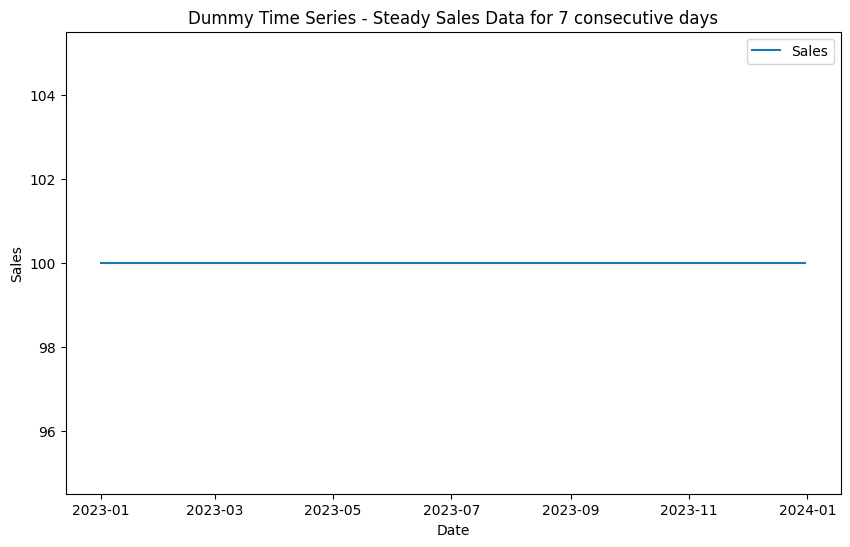

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Generating dates for the time series
date_range = pd.date_range(start='2023-01-01', periods=365)

# Creating a DataFrame with constant sales for seven consecutive days
steady_sales_data = pd.DataFrame({'Date': date_range})
steady_sales_data['Sales'] = 100  # Constant sales value for all days

# Plotting the time series data
plt.figure(figsize=(10, 6))
plt.plot(steady_sales_data['Date'], steady_sales_data['Sales'], label='Sales')
plt.title('Dummy Time Series - Steady Sales Data for 7 consecutive days')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [ ]:
# Check for seven consecutive days of steady sales
for i in range(len(steady_sales_data) - 6):
    subset = steady_sales_data['Sales'].iloc[i:i+7]
    if subset.std() < 1:  # Threshold for steady sales
        print("Steady sales found from {} to {}".format(subset.index[0], subset.index[-1]))
        break


Steady sales found from 0 to 6


In [ ]:
models = ['RetinaNet', 'YOLOv8', 'EfficientDet', 'SSD']

precision = [0.93, 0.96, 0.92, 0.91]
recall = [0.90, 0.91, 0.89, 0.89]
f1 = [0.915, 0.935, 0.905, 0.90]
mAP = [0.92, 0.94, 0.91, 0.90]
import matplotlib.pyplot as plt


x = range(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, precision, width, label='Precision (%)', color='salmon')
ax.bar([i + width for i in x], recall, width, label='Recall (%)', color='lightgreen')
ax.bar([i + 2 * width for i in x], f1, width, label='F1 (%)', color='gold')
ax.bar([i + 3 * width for i in x], mAP, width, label='mAP (%)', color='skyblue')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Model')
ax.set_xticks([i + 1.5 * width for i in x])
ax.set_xticklabels(models)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['RetinaNet', 'YOLOv8', 'EfficientDet', 'SSD']
precision = [0.93, 0.96, 0.90, 0.91]
recall = [0.88, 0.89, 0.87, 0.87]
end = [0.1, 0.3, 0.2, 0.28]
end2 = [0.98, 0.94, 0.90, 0.93]
a = 0.03

for i in range(len(precision)):
    # Generate points for precision-recall curve
    decreasing_seq = np.linspace(1, (precision[i] + a), num=100, endpoint=False)
    middle = np.linspace((precision[i] + a), precision[i] - a, num=20, endpoint=False)
    increasing_seq = np.linspace(precision[i] - a, end[i], num=50)
    y = np.concatenate((decreasing_seq, middle, increasing_seq))

    x1 = np.linspace(0, recall[i] - a, num=100, endpoint=False)
    x2 = np.linspace(recall[i] - a, recall[i] + a/5, num=20, endpoint=False)
    x3 = np.linspace(recall[i] + a/5, end2[i], num=50)
    x = np.concatenate((x1, x2, x3))

    # Adding noise to the points to create slight variations
    y += np.random.uniform(-a / 10, a / 10, size=len(y))
    x += np.random.uniform(-a / 10, a / 10, size=len(x))

    plt.plot(x, y, label=models[i])

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')  # Adding a title to the plot
plt.legend()
plt.grid(True)
plt.show()
